<a href="https://colab.research.google.com/github/JACKARPANJACK/AI-Lab-6th-sem/blob/main/BFS_vs_DFS_performance_measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib numpy

Generated Maze:


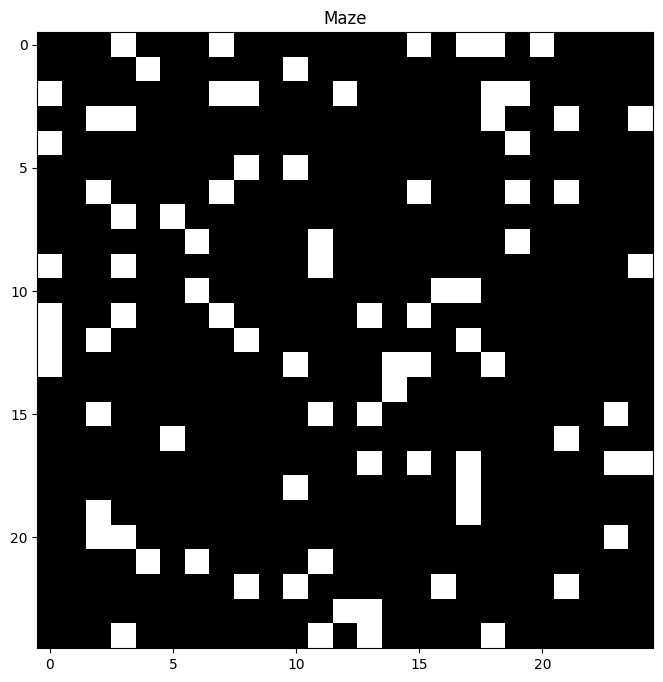

Running BFS...
Running DFS...
BFS Path found! Nodes visited: 538


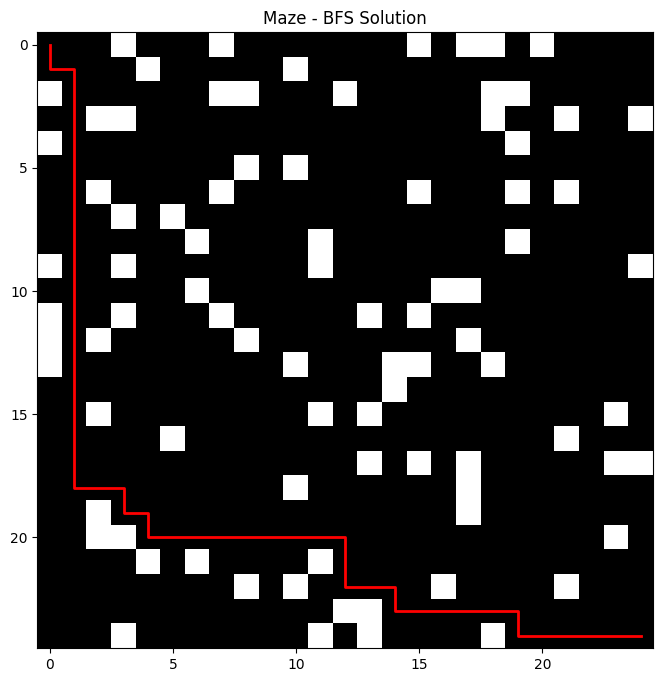

DFS Path found! Nodes visited: 485


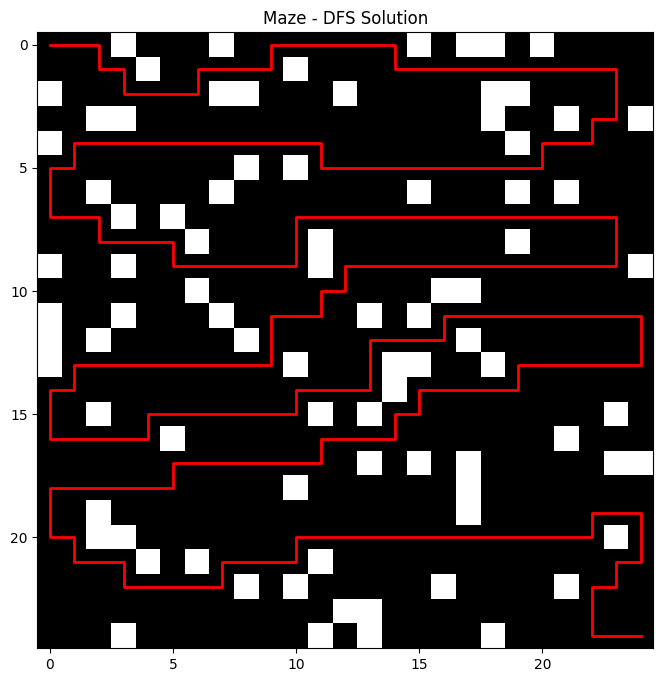


=== Efficiency Comparison ===
BFS - Nodes visited: 538, Path length: 49
DFS - Nodes visited: 485, Path length: 219

Difference in nodes visited: 53
DFS is 10.93% more efficient than BFS

Path quality (shorter is better):
BFS path length: 49
DFS path length: 219
BFS found a shorter or equal path


In [ ]:
#BFS vs DFS performance comparison
#run on colab

import random
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

def generate_maze(rows, cols, density=0.25):
    maze = np.ones((rows, cols), dtype=int)

    for r in range(rows):
        for c in range(cols):
            if random.random() < density:
                maze[r][c] = 0  # wall

    # Force start and end open
    maze[0][0] = 1
    maze[rows-1][cols-1] = 1

    return maze

def bfs(maze, start, goal):
    rows, cols = maze.shape
    queue = deque([start])
    visited = set([start])
    parent = {start: None}

    moves = [(1,0), (-1,0), (0,1), (0,-1)]  # Up/Down/Left/Right

    while queue:
        r, c = queue.popleft()

        # Goal reached
        if (r, c) == goal:
            path = []
            cur = goal
            while cur:
                path.append(cur)
                cur = parent[cur]
            return path[::-1], len(visited)  # reversed, nodes visited

        # Explore neighbors
        for dr, dc in moves:
            nr, nc = r + dr, c + dc

            if 0 <= nr < rows and 0 <= nc < cols:
                if maze[nr][nc] == 1 and (nr, nc) not in visited:
                    visited.add((nr, nc))
                    parent[(nr, nc)] = (r, c)
                    queue.append((nr, nc))

    return None, len(visited)  # No path found

def dfs(maze, start, goal):
    rows, cols = maze.shape
    stack = [start]
    visited = set([start])
    parent = {start: None}

    moves = [(1,0), (-1,0), (0,1), (0,-1)]  # Up/Down/Left/Right

    while stack:
        r, c = stack.pop()

        # Goal reached
        if (r, c) == goal:
            path = []
            cur = goal
            while cur:
                path.append(cur)
                cur = parent[cur]
            return path[::-1], len(visited)  # reversed, nodes visited

        # Explore neighbors
        for dr, dc in moves:
            nr, nc = r + dr, c + dc

            if 0 <= nr < rows and 0 <= nc < cols:
                if maze[nr][nc] == 1 and (nr, nc) not in visited:
                    visited.add((nr, nc))
                    parent[(nr, nc)] = (r, c)
                    stack.append((nr, nc))

    return None, len(visited)  # No path found

def plot_maze(maze, path=None, title="Maze"):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='gray_r')  # 1 = white, 0 = black
    plt.title(title)

    if path:
        pr, pc = zip(*path)
        plt.plot(pc, pr, color='red', linewidth=2)  # Path

    plt.show()

def compare_efficiency(bfs_visited, dfs_visited, bfs_path_len, dfs_path_len):
    """Compare efficiency between BFS and DFS"""
    print("\n=== Efficiency Comparison ===")
    print(f"BFS - Nodes visited: {bfs_visited}, Path length: {bfs_path_len}")
    print(f"DFS - Nodes visited: {dfs_visited}, Path length: {dfs_path_len}")

    efficiency_diff = abs(bfs_visited - dfs_visited)
    print(f"\nDifference in nodes visited: {efficiency_diff}")

    if bfs_visited < dfs_visited:
        efficiency_ratio = (dfs_visited - bfs_visited) / bfs_visited * 100
        print(f"BFS is {efficiency_ratio:.2f}% more efficient than DFS")
    elif dfs_visited < bfs_visited:
        efficiency_ratio = (bfs_visited - dfs_visited) / dfs_visited * 100
        print(f"DFS is {efficiency_ratio:.2f}% more efficient than BFS")
    else:
        print("Both algorithms are equally efficient")

    print(f"\nPath quality (shorter is better):")
    print(f"BFS path length: {bfs_path_len}")
    print(f"DFS path length: {dfs_path_len}")
    if bfs_path_len <= dfs_path_len:
        print(f"BFS found a shorter or equal path")
    else:
        print(f"DFS found a shorter path")

rows, cols = 25, 25
maze = generate_maze(rows, cols, density=0.15)

start = (0, 0)
goal = (rows - 1, cols - 1)

print("Generated Maze:")
plot_maze(maze)

print("Running BFS...")
bfs_result = bfs(maze, start, goal)
path_bfs, bfs_visited = bfs_result if bfs_result[0] else (None, bfs_result[1])

print("Running DFS...")
dfs_result = dfs(maze, start, goal)
path_dfs, dfs_visited = dfs_result if dfs_result[0] else (None, dfs_result[1])
if path_bfs:
    print(f"BFS Path found! Nodes visited: {bfs_visited}")
    plot_maze(maze, path_bfs, "Maze - BFS Solution")
else:
    print(f"No BFS path existed. Nodes visited: {bfs_visited}")

if path_dfs:
    print(f"DFS Path found! Nodes visited: {dfs_visited}")
    plot_maze(maze, path_dfs, "Maze - DFS Solution")
else:
    print(f"No DFS path existed. Nodes visited: {dfs_visited}")

# Compare efficiency
if path_bfs and path_dfs:
    compare_efficiency(bfs_visited, dfs_visited, len(path_bfs), len(path_dfs))